In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [3]:
usa_ufos = pd.read_csv('../data/usa_ufos_clean2.csv', nrows = 132308,  encoding='unicode_escape')
usa_ufos.head()

,occurred,city,state,country,shape,summary,reported,posted,image
0,2/15/2024 14:20,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN
1,2/15/2024 6:21,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN
2,2/14/2024 22:45,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN
3,2/14/2024 22:44,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y
4,2/14/2024 22:15,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y


In [4]:
shape_counts = usa_ufos['shape'].value_counts()
shape_counts = pd.DataFrame(shape_counts).reset_index()
shape_counts.columns = ['shape', 'count']

shape_counts.sort_values('count', ascending=False)
shape_counts

,shape,count
0,LIGHT,24664
1,CIRCLE,12763
2,TRIANGLE,11846
3,UNKNOWN,9023
4,FIREBALL,8980
5,OTHER,8874
6,DISK,7549
7,SPHERE,6752
8,OVAL,5649
9,ORB,5494


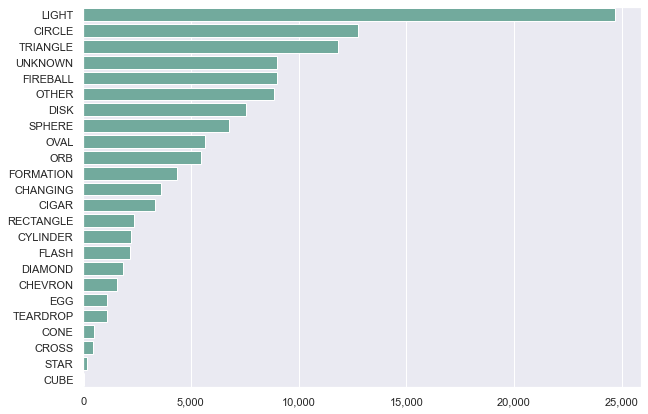

In [17]:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="count", 
    y='shape', 
    data=shape_counts, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
#plt.title('Shapes Observed')
#plt.xlabel('Total Number of Sightings')
#plt.ylabel('Total Number of Sightings')
ax.set(xlabel=None)
ax.set(ylabel=None);
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig('Shapes Observed', dpi=300)

Let's dive deeper.

Where are these being seen?

In [6]:
shapes_state = usa_ufos[['shape', 'state', 'city']].value_counts()
shapes_state = pd.DataFrame(shapes_state).reset_index()
shapes_state.columns = ['shape', 'state', 'city', 'count']

shapes_state.sort_values('count', ascending=False)
shapes_state

,shape,state,city,count
0,LIGHT,AZ,PHOENIX,155
1,LIGHT,WA,SEATTLE,146
2,LIGHT,NY,NEW YORK CITY,129
3,LIGHT,NV,LAS VEGAS,128
4,LIGHT,CA,SAN DIEGO,127
...,...,...,...,...
67548,FIREBALL,WV,MOUNT HOPE,1
67549,FIREBALL,WV,OAK HILL,1
67550,FIREBALL,WV,RIDGE MOUNTAIN ELKINS,1
67551,FIREBALL,WV,ROCKPORT,1


In [7]:
shapes_state = shapes_state[shapes_state['count'] > 1]
shapes_state

,shape,state,city,count
0,LIGHT,AZ,PHOENIX,155
1,LIGHT,WA,SEATTLE,146
2,LIGHT,NY,NEW YORK CITY,129
3,LIGHT,NV,LAS VEGAS,128
4,LIGHT,CA,SAN DIEGO,127
...,...,...,...,...
19688,CIRCLE,IA,IOWA CITY,2
19689,CIRCLE,TX,ANNA,2
19690,DIAMOND,FL,JUPITER,2
19691,UNKNOWN,FL,PACE,2


In [8]:
shapes_state = shapes_state[shapes_state['shape'] != 'UNKNOWN']
shapes_state = shapes_state[shapes_state['city'] != 'UNKNOWN']

In [9]:
shapes_state = shapes_state[shapes_state['shape'] != 'OTHER']

shapes_state

,shape,state,city,count
0,LIGHT,AZ,PHOENIX,155
1,LIGHT,WA,SEATTLE,146
2,LIGHT,NY,NEW YORK CITY,129
3,LIGHT,NV,LAS VEGAS,128
4,LIGHT,CA,SAN DIEGO,127
...,...,...,...,...
19685,TRIANGLE,OH,GIRARD,2
19687,CIGAR,FL,MAITLAND,2
19688,CIRCLE,IA,IOWA CITY,2
19689,CIRCLE,TX,ANNA,2


In [10]:
shapes_state['state'].value_counts()

CA         2261
FL         1086
WA          835
TX          713
NY          681
PA          609
OH          606
IL          552
NC          504
MI          497
AZ          483
OR          432
MA          414
GA          399
CO          391
NJ          369
VA          354
CT          346
WI          325
MO          325
IN          324
SC          304
TN          300
MN          276
MD          262
KY          212
UT          199
OK          188
AL          176
NM          165
NH          164
AR          158
LA          158
IA          156
ID          156
ME          144
KS          141
NV          134
MT          129
MS          110
RI          105
WV          105
HI           86
AK           84
NE           77
VT           63
DE           61
WY           53
SD           46
ND           28
DC           15
Unknown       1
Name: state, dtype: int64